## Problem Definition
Predict housing prices based on a key feature (e.g., square footage) using a suitable machine learning model.
The goal is to capture the relationship between house size and price to make accurate future predictions.


## Data Loading

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housing_data.csv")

In [3]:
df.head()

,area_in_sqft,price_in_dollars
0,398,275000.0
1,393,290000.0
2,401,294000.0
3,418,292000.0
4,390,321000.0


## Data Exploration & Preprocessing

In [4]:
df.describe()

,area_in_sqft,price_in_dollars
count,500.000000,5.000000e+02
mean,2130.488000,1.551956e+06
std,1029.640906,7.449300e+05
min,390.000000,2.750000e+05
25%,1258.750000,9.062500e+05
50%,2109.500000,1.544000e+06
75%,2973.250000,2.156250e+06
max,4247.000000,3.210000e+06


In [5]:
import matplotlib.pyplot as plt

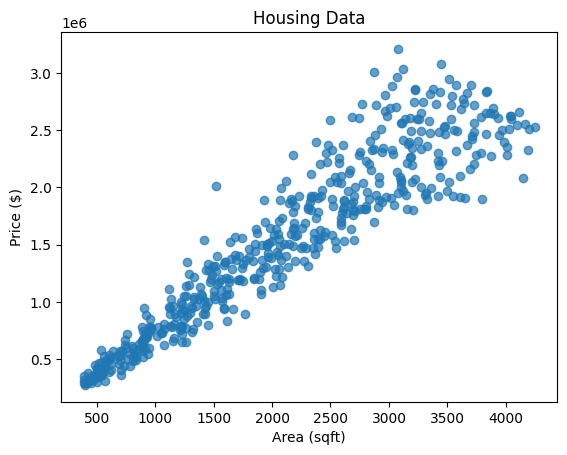

In [6]:
plt.scatter(df["area_in_sqft"], df["price_in_dollars"], alpha=0.7)
plt.title("Housing Data")
plt.xlabel("Area (sqft)")
plt.ylabel("Price ($)")
plt.show()

In [7]:
y = df["price_in_dollars"]
X = df[["area_in_sqft"]]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 1) (400,)
(100, 1) (100,)


## Model Selection & Training

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.predict([[1000]])

array([792965.64403337])

## Model Interpretation

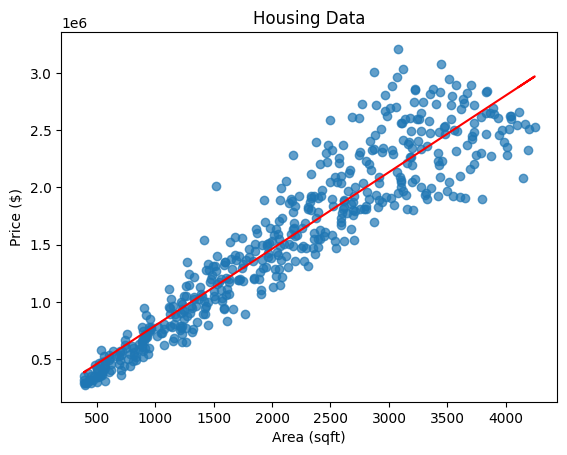

In [14]:
plt.scatter(df["area_in_sqft"], df["price_in_dollars"], alpha=0.7)
plt.plot(X, model.predict(X), color="red")
plt.title("Housing Data")
plt.xlabel("Area (sqft)")
plt.ylabel("Price ($)")
plt.show()

In [15]:
model.predict([[4000]])

array([2803964.11342399])

**Model Representation**

Model as a straight line  
$y = mx + c$  
y -> price of the house  
x -> area  
m -> slope  
c -> y-intercept  

In machine learning terms,  
$y = w_{1}x_{1} + b$  

$\text{price} = w_1.\text{area} + b$

$w_1$ -> co-efficient of area  
$b$ -> bias

In [16]:
model.coef_

array([670.33282313])

In [17]:
model.intercept_

np.float64(122632.82090315572)

In [18]:
def predict_housing_price(area):
    return 670.33282313*area + 122632.82090315572

In [19]:
predict_housing_price(1000)

792965.6440331556

## Model Evaluation

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
rmse_train = mean_squared_error(y_train, model.predict(X_train))**0.5
rmse_test = mean_squared_error(y_test, model.predict(X_test))**0.5

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

RMSE Train: 270351.4949890214
RMSE Test: 237517.88215283147


## Model Deployment 

The trained model can now be deployed through a **Streamlit application** to provide an interactive interface for housing price prediction.  
In the app, a user can input the area of a house, and the underlying function `predict_housing_price(area)` will compute the predicted price based on our trained model.

Refer to `01_housing_price_prediction/app.py` for the Streamlit application code.

